<h1><center>Laboratorio 6: El Pandas no Muerde (act III) 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesores: Ignacio Meza, Gabriel Iturra
- Auxiliar: Sebastián Tinoco
- Ayudantes: Arturo Lazcano, Angelo Muñoz

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Daniel Quilodrán
- Nombre de alumno 2: Katherine Rutte


### **Link de repositorio de GitHub:** `https://github.com/quilo98/Labs_MDS`


## Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Aplicar los paradigmas y buenas prácticas de programación vistas hasta este momento.
- Comprender y aprovechar las ventajas que nos ofrece la liberia `numpy` con respecto a trabajar en Python 'puro'.
- Visualizar aplicaciones de filtros de imágenes sin el uso de librerías.
- Verificar que el uso indiscriminado de `for` puede afectar en la eficiencia en al procesar datos masivos.


El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `numpy`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre arreglos (*o tensores*).

## Descripción del laboratorio.

### Importamos librerias utiles 😸

In [66]:
!pip install --upgrade plotly

In [67]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [68]:
# Libreria Core del lab.
import numpy as np
import pandas as pd
import datetime
from scipy import stats

from IPython.display import display, Markdown, Latex

#Libreria para plotear
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px

In [69]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except: 
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


# Segmentación de Clientes en Tienda de Retail 🛍️

<p align="center">
  <img width=300 src="https://s1.eestatic.com/2018/04/14/social/la_jungla_-_social_299733421_73842361_854x640.jpg">
</p>

## 1.1 Cargar Dataset

Mr. Lepin Mora quien es el gerente de una cotizada tienda de retail en Europa, les solicita si pueden analizar los datos de algunas de sus tiendas y si es posible extraer los diferenciar los tipos de clientes que posee el retail.

Para esto, el área de ventas les entrega el archivo `online_retail_II.xlsx` con el que se les pide que cargue y visualicen algunas de las filas que componen el Dataset.

Realice una primera visualización de los datos y señale los atributos que componen el dataset. Señale las columnas que conforman el dataset, el tipo de variable presente en cada columna y comente que representa cada una de estas.

**Respuesta:**

In [70]:
df_retail = pd.read_pickle("online_retail_II.pickle")
df_retail = df_retail.astype(
    {
        "Invoice": "category",
        "StockCode": "category",
        "Description": str,
        "Customer ID": "category",
    }
)
df_retail.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


## 1.2 Análisis Explotatorio de los Datos [0.5 puntos] 

En base a la primera visualización del dataset, *Don Mora* le solicita que realicen un análisis exploratorio de los datos, para esto les deberán realizar un análisis univariado y multivariado. De la revisión, ustedes deben explicar potenciales anomalías visualizadas y señalar si existe la necesidad de realizar una limpieza de datos.

Explique a que nos referimos con análisis univariable, multivariable y de datos faltantes. ¿Qué beneficios nos otorga estudiar estos datos?. Sea conciso con su respuesta y no escriba mas de 5 líneas para su respuesta.

**Respuesta a la Pregunta:**

> Respuesta Aquí 
```
El analisis univariable se refiere a estudiar el comportamiento de una variable de forma individual, con el objetivo de comprender como cada variable por si sola influye en el problema a resolver. Se ocupan distintas tecnicas estadisticas y graficas para analizar variables numericas y categoricas
El analisis multivariable es utilizado para estudiar la interacción entre variables, es decir se estudia mas de una variable simultaneamente con el objetivo de identificar relaciones entre ellas.
Con respecto al analisis de datos faltantes es el proceso de identificar valores faltantes en el conjunto de datos para posteriormente aplicar tecnicas de imputacion de valores faltantes.
```

### 1.2.1 Análisis Univariado [2 Puntos]

A continuación, se le presentan dos funciones para analizar los datos que componen un dataframe. La primera de estas es la función ``profile_serie()`` la cual recibe una serie y le entrega un análisis detallado de los datos que conforman dicha serie. 

Ejecute la funcion ``profile_serie()`` sobre cada serie para realizar un análisis univariado de estas. A continuación, comente acerca de el comportamiento de cada variable según las estadísticas descriptivas y los gráficos generados.

In [71]:
from pandas.api.types import is_numeric_dtype
from pandas.core.dtypes.common import is_datetime_or_timedelta_dtype


def profile_serie(serie_in, n_samples=1000, random_state=42):
    serie = serie_in.copy()

    profile = pd.Series(dtype='object')
    profile["Type"] = serie.dtype
    profile = pd.concat([profile, serie.describe(datetime_is_numeric=True)])

    # profile = pd.Series([])

    if is_numeric_dtype(serie):
        profile["Negative"] = (serie < 0).sum()
        profile["Negative (%)"] = (
            str(round((serie < 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Zeros"] = (serie == 0).sum()
        profile["Zeros (%)"] = (
            str(round((serie == 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Kurt"] = serie.kurt()
        profile["Skew"] = serie.skew()

    profile[" "] = " "  # espacio

    profile["Missing cells"] = serie.isnull().sum()
    profile["Missing cells (%)"] = (
        str(round(serie.isnull().sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Duplicate rows"] = serie.duplicated(False).sum()
    profile["Duplicate rows (%)"] = (
        str(round(serie.duplicated(False).sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Total size in memory"] = str(serie.memory_usage(index=True)) + " bytes"

    # profile = pd.concat([profile, description])

    profile = profile.rename(
        index={
            "count": "Number of observations",
            "mean": "Mean",
            "std": "Std",
            "min": "Min",
            "max": "Max",
            "unique": "Unique",
            "top": "Top",
            "freq": "Freq",
        }
    )
    no_outliers_fig = None

    if is_numeric_dtype(serie):

        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(
            sampled_serie, marginal="box", title=f"{serie.name} - With Outliers"
        )

        no_outliers = sampled_serie.loc[(np.abs(stats.zscore(sampled_serie)) < 3)]
        # zscore = https://es.wikipedia.org/wiki/Unidad_tipificada
        
        no_outliers_fig = px.histogram(
            no_outliers, marginal="box", title=f"{serie.name} - Without Outliers"
        )

    elif is_datetime_or_timedelta_dtype(serie):
        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(sampled_serie, marginal="box", title=f"{serie.name}")
    
    else:
            count = (
                serie.value_counts()[0:100]
                .reset_index()
                .rename(columns = {serie.name: 'Count'})
            )
            fig = px.bar(
                x=count['index'].astype(str),
                y=count["Count"],
                title=f"100 Most common categories of {serie.name}",
            )
    
    display(Markdown(f'## {serie.name} Profile'))
    display(profile)
    fig.show()

    if no_outliers_fig:
        no_outliers_fig.show()

    # return fig, profile

In [72]:
# Analisis de Price
profile_serie(df_retail['Price']) 

## Price Profile

Type                            float64
Number of observations         525461.0
Mean                           4.688834
Std                          146.126914
Min                           -53594.36
25%                                1.25
50%                                 2.1
75%                                4.21
Max                            25111.09
Negative                              3
Negative (%)                      0.0 %
Zeros                              3687
Zeros (%)                         0.7 %
Kurt                       64868.344873
Skew                        -140.768446
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   524485
Duplicate rows (%)              99.81 %
Total size in memory      4203816 bytes
dtype: object

    Análisis de la primera serie: Price

Corresponde a una variable númerica (float64) que representa el precio del producto en USD. El precio promedio es de 4.68 USD. Es importante mencionar que se observan valores atípicos, en particular, se observan 3 valores negativos, lo que es extraño para una variable que por definición debiese ser positiva. Presenta una curtosis alta lo que indica que los precios se concentran alrededor de la media de la distribución y hay más valores extremos en la distribución. En el histograma y el boxplot sin outliers se puede observar que la distribución se encuentra sesgada hacia la derecha, es decir los datos tienden a estar por bajo la media y se encuentran mas dispersos en el lado derecho de la distribución (existen algunos precios muy elevados).

In [73]:
# Analisis de Invoice
profile_serie(df_retail["Invoice"])

## Invoice Profile

Type                           category
Number of observations           525461
Unique                            28816
Top                              537434
Freq                                675
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   517456
Duplicate rows (%)              98.48 %
Total size in memory      2338386 bytes
dtype: object

    Análisis de la serie Invoice

Corresponde a una variable categorica (category) que representa el numero de la factura o boleta. Se observan 28816 valores únicos y 525461 observaciones (No tiene valores faltantes), lo que indica que algunas boletas contienen la compra de más de un producto. Un 98.48% de las filas se encuentran duplicadas, es decir la mayoria de las boletas estan asociadas a más de un producto. En el gráfico de barras se observa que algunos numeros de boleta o factura se repiten más de 200 veces, lo que muestra que las compras realizadas son grandes (incluyen varios productos).


In [74]:
# Analisis de StockCode
profile_serie(df_retail["StockCode"])

## StockCode Profile

Type                           category
Number of observations           525461
Unique                             4632
Top                              85123A
Freq                               3516
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525026
Duplicate rows (%)              99.92 %
Total size in memory      1220242 bytes
dtype: object

In [75]:
filas_filtradas = df_retail[df_retail['StockCode'] == "85123A"]
filas_filtradas

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
102,489442,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2009-12-01 09:46:00,2.95,13635.0,United Kingdom
147,489446,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2009-12-01 10:06:00,2.55,13758.0,United Kingdom
271,489465,85123A,WHITE HANGING HEART T-LIGHT HOLDER,64,2009-12-01 10:52:00,2.55,13767.0,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
366,489517,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1,2009-12-01 11:34:00,2.95,16329.0,United Kingdom
...,...,...,...,...,...,...,...,...
524412,538086,85123A,WHITE HANGING HEART T-LIGHT HOLDER,14,2010-12-09 14:44:00,2.95,12872.0,United Kingdom
524519,538095,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1,2010-12-09 14:55:00,2.95,17097.0,Spain
524733,538145,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-09 16:08:00,2.95,15211.0,United Kingdom
525223,538157,85123A,WHITE HANGING HEART T-LIGHT HOLDER,4,2010-12-09 16:57:00,2.95,17576.0,United Kingdom


    Análisis de la serie: StockCode

Corresponde a una variable categórica (category) que representa el número de inventario, es decir, al codigo asociado a cada producto. Se observan 4632 valores únicos y 525461 valores observaciones (No tiene valores faltantes), lo que indica que se cuenta con 4632 productos diferentes. Un 99.92% de las filas se encuentran duplicadas, lo que tiene sentido ya que los productos se repiten en las distintas compras. En el gráfico de barras se observa que el producto asociado al código 85123A puede que sea el más vendido.


In [76]:
# Analisis de Description
profile_serie(df_retail["Description"])

## Description Profile

Type                                                  object
Number of observations                                525461
Unique                                                  4682
Top                       WHITE HANGING HEART T-LIGHT HOLDER
Freq                                                    3549
                                                            
Missing cells                                              0
Missing cells (%)                                      0.0 %
Duplicate rows                                        525198
Duplicate rows (%)                                   99.95 %
Total size in memory                           4203816 bytes
dtype: object

    Análisis de la serie: Description

Corresponde a una variable tipo str (object) que contiene información sobre un producto (el nombre de este la mayoria de las veces). Se observan 4682 valores únicos y 525461 observaciones (No tiene valores faltantes), es decir se cuentan con 4682 descripciones de producto diferentes lo que casi coincide con la cantidad de 'StockCode' unicos (hay una diferencia de 50). Un 99.95% de las filas se encuentran duplicadas, lo que tiene sentido ya que, como se menciono en el analisis para la variable 'StockCode', los productos se repiten en distintas compras. En el gráfico de barras se aprecia que el producto White Hanging Heart T-Light puede que sea el más vendido, el cual tiene asociado el StockCode 85123A, es decir, coincide con el análisis para la variable 'StockCode'.


In [77]:
# Analisis de Quantity
profile_serie(df_retail["Quantity"])

## Quantity Profile

Type                              int64
Number of observations         525461.0
Mean                          10.337667
Std                           107.42411
Min                             -9600.0
25%                                 1.0
50%                                 3.0
75%                                10.0
Max                             19152.0
Negative                          12326
Negative (%)                     2.35 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                        6277.666908
Skew                          36.044617
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525122
Duplicate rows (%)              99.94 %
Total size in memory      4203816 bytes
dtype: object

    Análisis de la serie: Quantity

Corresponde a una variable numérica (int64) que representa la cantidad vendida de cierto producto. La cantidad promedio es de 10 y la mediana es 3. Es importante mencionar que se observan valores atípicos, en particular, se observan 19152 valores negativos lo cual corresponde a un 2,35% del total de observaciones, esto es extraño ya que la naturaleza de esta variable es positiva (no pueden haber cantidades negativas). Presenta un curtosis alta lo que indica que los precios se concentran al rededor de la media (se puede observar que los precios se concentran entre 0 y 20 USD) y hay más valores extremos en la distribución. En el histograma y boxplot sin outliers, se puede observar que la distribución se concentra entre 0 y 20 (lo cual coincide con la curtosis) y se encuentra levenemente sesgada hacia la derecha, es decir las cantidades tienden a ser menores a 10 y se encuentran dispersas en el lado derecho de la distribución.

In [78]:
# Analisis de invoice date
profile_serie(df_retail["InvoiceDate"])

## InvoiceDate Profile

Type                                     datetime64[ns]
Number of observations                           525461
Mean                      2010-06-28 11:37:36.845017856
Min                                 2009-12-01 07:45:00
25%                                 2010-03-21 12:20:00
50%                                 2010-07-06 09:51:00
75%                                 2010-10-15 12:45:00
Max                                 2010-12-09 20:01:00
                                                       
Missing cells                                         0
Missing cells (%)                                 0.0 %
Duplicate rows                                   520400
Duplicate rows (%)                              99.04 %
Total size in memory                      4203816 bytes
dtype: object

    Análisis de la serie: Invoice

Corresponde a una variable temporal (datetime64[ns]) que contiene una marca temporal de cuando fue emitida la boleta o factura, es decir, cuando fue procesada la compra. La fecha más antigua en la que se registró una compra es el 2009-12-01 y la más reciente es el 2010-12-09, o sea, se tiene información sobre las compras realizadas en un período de 1 año. En el grafico se aprecia que en el último trimestre del 2010 aumento la cantidad de registros temporales.

In [79]:
# Analisis de customer ID
profile_serie(df_retail["Customer ID"])

## Customer ID Profile

Type                           category
Number of observations         417534.0
Unique                           4383.0
Top                             14911.0
Freq                             5710.0
                                       
Missing cells                    107927
Missing cells (%)               20.54 %
Duplicate rows                   525327
Duplicate rows (%)              99.97 %
Total size in memory      1218250 bytes
dtype: object

In [80]:
filas_filtradas = df_retail[df_retail['Customer ID'] == 14911.0]
filas_filtradas

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
440,489520,35751C,PURPLE CURRENT CANDLE RING,12,2009-12-01 11:41:00,0.75,14911.0,EIRE
441,489520,72739B,WHITE CHOCOLATE SCENT CANDLE,12,2009-12-01 11:41:00,1.25,14911.0,EIRE
442,489520,22114,HOT WATER BOTTLE TEA AND SYMPATHY,8,2009-12-01 11:41:00,3.95,14911.0,EIRE
443,489520,22212,FOUR HOOK WHITE LOVEBIRDS,6,2009-12-01 11:41:00,2.10,14911.0,EIRE
444,489520,21523,FANCY FONT HOME SWEET HOME DOORMAT,2,2009-12-01 11:41:00,6.75,14911.0,EIRE
...,...,...,...,...,...,...,...,...
523021,538009,21754,HOME BUILDING BLOCK WORD,3,2010-12-09 12:17:00,5.95,14911.0,EIRE
523022,538009,22840,ROUND CAKE TIN VINTAGE RED,2,2010-12-09 12:17:00,7.95,14911.0,EIRE
523023,538009,22842,BISCUIT TIN VINTAGE RED,2,2010-12-09 12:17:00,6.75,14911.0,EIRE
523024,538009,22197,SMALL POPCORN HOLDER,36,2010-12-09 12:17:00,0.85,14911.0,EIRE


    Análisis de la serie: Customer ID

Corresponde a una variable categorica (category) que representa el ID del cliente que efectuo la compra. Se tienen 417534 observaciones y 1007927 valores faltantes, esto último corresponde a un 20% del total de observaciones. Por otro lado se observan 4383 valores únicos, lo que indica que 4383 clientes distintos compraron en la tienda de retail en el período de 1 año. En el gráfico de barras se observa que el cliente que tiene ID 14911 es el que realizó más compras o transacciones realizó (en términos de distintos articulos comprados).

In [81]:
# Analisis de country
profile_serie(df_retail["Country"])

## Country Profile

Type                              object
Number of observations            525461
Unique                                40
Top                       United Kingdom
Freq                              485852
                                        
Missing cells                          0
Missing cells (%)                  0.0 %
Duplicate rows                    525461
Duplicate rows (%)               100.0 %
Total size in memory       4203816 bytes
dtype: object

    Análisis de la n-esima serie: Country 

Corresponde a una variable categórica que representa el país donde se realizó la compra. Se tienen 525461 observaciones, es decir, no se tienen valores faltantes. Por otro lado tiene 40 valores únicos, o sea, la tienda tiene presencia en 40 países. Además se tiene que todas las filas se encuentran duplicadas, lo que indica que en todos los países se realizo al menos más de 2 compras. Finalmente el gráfico muestra que el país donde se efectuan una mayor cantidad de transacciones es Reino Unido y que el retail opera en su mayor parte en Europa.


### 1.2.2 Análisis Multivariado y Datos Faltantes [1 ptos]

En segundo lugar encontrará la función ``profile_df()`` que recibe un dataframe como entrada y realiza un análisis bivariado de todas las variables numéricas que conforman el dataframe, un analisis de la correlación de Pearson entre las variables numericas del dataframe y la matriz de datos faltantes. Ejecute la función `profile_df` y comente sus resultados.

In [82]:
def profile_df(dataframe_in):
    df = dataframe_in.copy()

    list_type = []
    for col in list(df.columns):
        if is_numeric_dtype(df[col]) or \
        pd.core.dtypes.common.is_datetime_or_timedelta_dtype(df[col]):
            list_type.append(col)

    
    display(Markdown('## Bivariant Analysis:'))
    for i in range(len(list_type)):
        for j in range(i+1, len(list_type)):
            plt.scatter(df[list_type[i]], df[list_type[j]])
            plt.xlabel(list_type[i]) 
            plt.ylabel(list_type[j]) 
            plt.title(f"{list_type[i]} v/s {list_type[j]}")
            plt.show()

    display(Markdown('## Correlation:'))
    fig_corr = px.imshow(df[list_type].corr())
    fig_corr.show()

    display(Markdown('## Missing Matrix:'))
    fig, ax = plt.subplots(figsize=[15, 10])
    msno.matrix(df, ax=ax, sparkline=False)

## Bivariant Analysis:

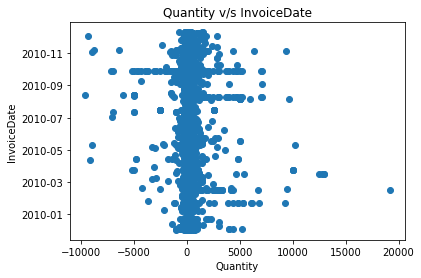

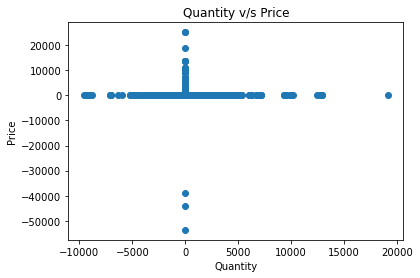

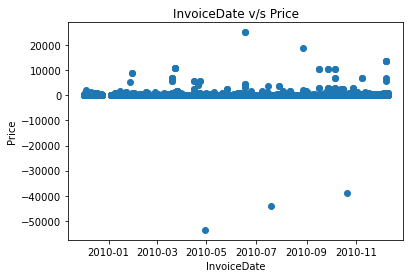

## Correlation:

## Missing Matrix:

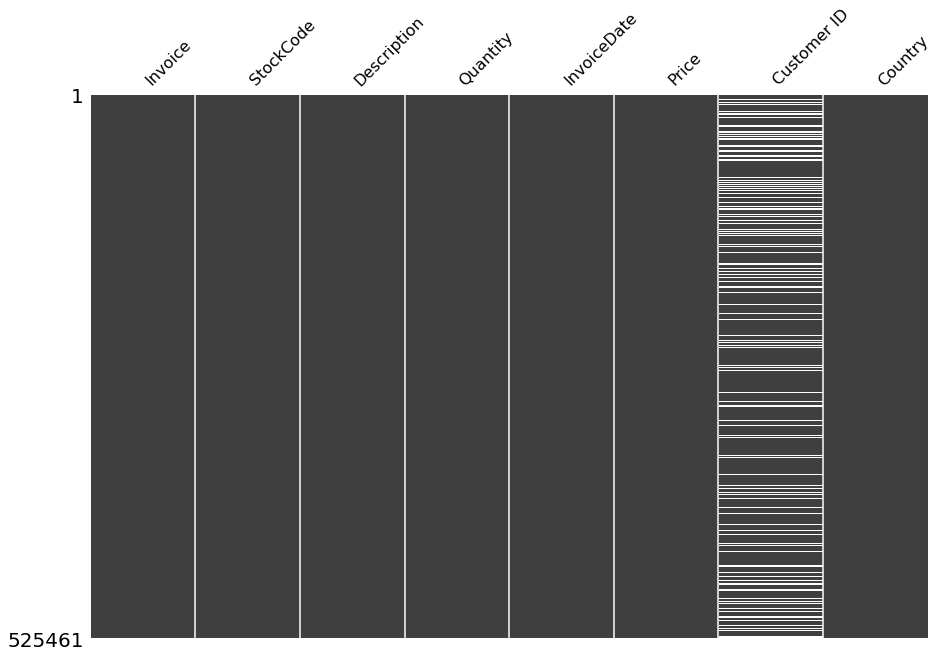

In [83]:
profile_df(df_retail)

A continuación se comentan los resultados de los gráficos:
* En el primer gráfico de Invoice Date vs Quantity, podemos observar algunos comportamientos extraños, principalmente con la existencia de cantidades negativas de ventas en algunos días, esto no hace sentido ya que no deberían existir "ventas negativas" dentro de nuestros datos, si omitimos esto, podemos observar que existe una gran concentración de Quantity a lo largo de los días en los valores entre 0 y 5.000, con algunos datos que se escapan de estos valores siendo el máximo cercano a los 20.000
* En el segundo gráfico de Quantity vs Price se observa algo similar que en el anterior, donde aparecen tanto precio como cantidades negativas, lo cual no corresponde a la naturaleza de nuestros datos, omitiendo esto, se observa que los valores de cantidades varía bastante para los productos con valores cercanos a cero, aquí se concentra la mayor variación en cuanto a la cantidad, mientras que por otro lado, para los productos con precios mas altos los valores de cantidad se mantienen cercanos a cero, dando a entender que al realizar una compra de un objeto caro esto no se hace en grandes cantidades.
* En el tercer gráfico de Price vs Invoice Date, hay al menos 3 datos que presentan precios negativos, lo que nuevamente no hace sentido a nuestros datos, omitiendo esto, la concentración de los precios se mantienen en valores pequeños, exceptuando por algunos outliers, pero no se observa algún cambio significativo en la concentración de precio frente a los distintos días analizados.
* En cuanto a la matriz de correlación este no presenta una correlación en las variables analizadas (Price y Quantity) con un valor de 0.002 Aprox.
* Por último la Missing Matrix nos muestra que para la columna 'Customer ID' presenta bastantes datos perdidos, es decir, no se puede identificar al cliente que realizó la compra, esto debe tratarse según el análisis que queramos realizar, por ejemplo, en caso de querer observar las ventas totales por productos esto no es relevante, por otro lado si queremos analizar las compras realizadas por un consumidor en particular, se deberán tratar de manera distinta ya que si nos afectaría bastante el tener datos faltantes.

### 1.2.3 Limpieza de Datos [1 pto]

Como pudo ver en las secciones anteriores, los datos presentan valores erroneos, es por esto que se le solicita que genere una función que permita limpiar el dataset. Realice esta función en base observaciones propias y considere como imposible tener cantidades negativas en las ventas.

Una vez realizada la función, realice nuevamente el análisis exploratorio y comente las principales diferencias.

**Respuesta:**

In [84]:
def limpieza_datos(df):
    # Crear una copia explícita del DataFrame
    df_copy = df.copy()
    
    # Filtrar filas donde Quantity sea mayor o igual a 1 y Price sea mayor o igual a 1 
    df_copy = df_copy[df_copy['Quantity'] >= 1]
    df_copy = df_copy[df_copy['Price'] >= 0]
    
    # Agregar -1 como una nueva categoría y rellenar valores faltantes
    df_copy["Customer ID"] = df_copy["Customer ID"].cat.add_categories([-1])
    df_copy["Customer ID"].fillna(-1, inplace=True)
    
    return df_copy

In [85]:
df = limpieza_datos(df_retail)

In [86]:
# Analisis de customer ID
profile_serie(df["Customer ID"])

## Customer ID Profile

Type                           category
Number of observations         513132.0
Unique                           4315.0
Top                                -1.0
Freq                           105437.0
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   513039
Duplicate rows (%)              99.98 %
Total size in memory      5298528 bytes
dtype: object

In [87]:
# Analisis de quantity
profile_serie(df["Quantity"])

## Quantity Profile

Type                              int64
Number of observations         513132.0
Mean                          11.715475
Std                           92.974904
Min                                 1.0
25%                                 1.0
50%                                 3.0
75%                                10.0
Max                             19152.0
Negative                              0
Negative (%)                      0.0 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                        9645.549205
Skew                          80.347813
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   512968
Duplicate rows (%)              99.97 %
Total size in memory      8210112 bytes
dtype: object

In [88]:
# Analisis de Price
profile_serie(df["Price"])

## Price Profile

Type                            float64
Number of observations         513132.0
Mean                           4.239585
Std                            63.56784
Min                                 0.0
25%                                1.25
50%                                 2.1
75%                                4.21
Max                            25111.09
Negative                              0
Negative (%)                      0.0 %
Zeros                              1566
Zeros (%)                        0.31 %
Kurt                       61738.835225
Skew                          210.68695
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   512276
Duplicate rows (%)              99.83 %
Total size in memory      8210112 bytes
dtype: object

## Bivariant Analysis:

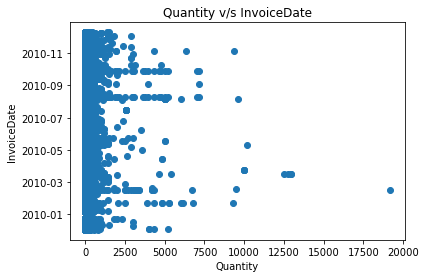

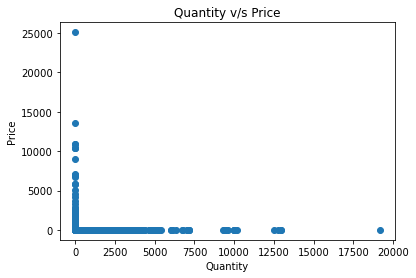

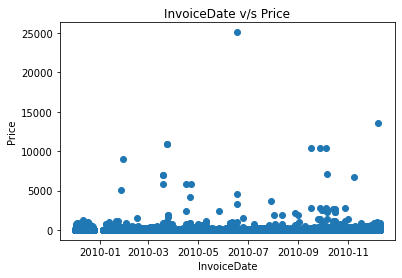

## Correlation:

## Missing Matrix:

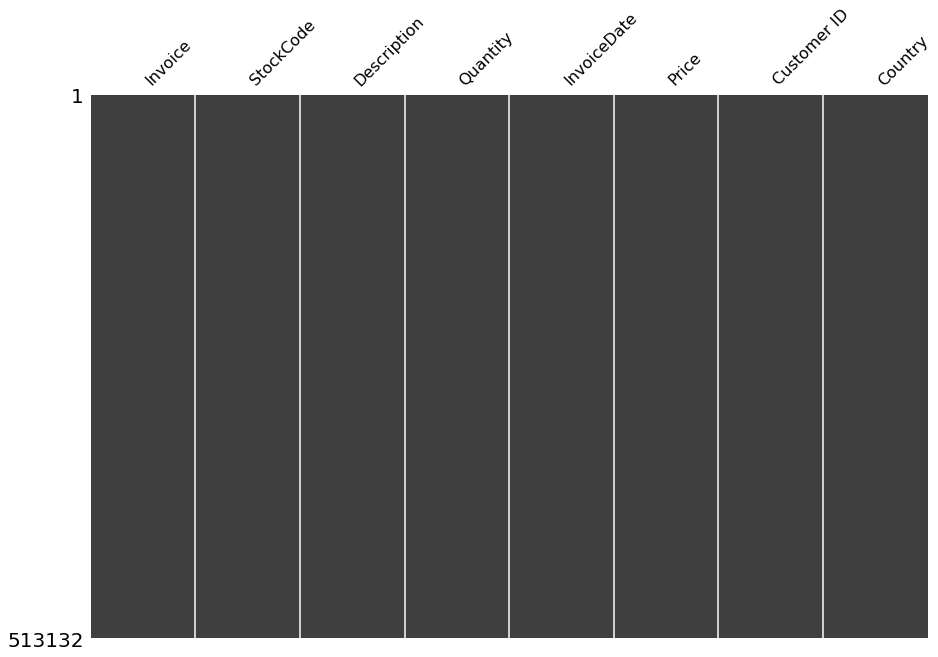

In [89]:
profile_df(df)

Para realizar la limpieza de datos se crea una función que elimina las filas que posean un valor de Price menor a cero o un valor de Quantity menor a 1, ya que al ser cerca de un 2% de los datos no reducía en gran medida la muestra por lo que decidió eliminar dichas filas, además para las filas donde el Customer ID era desconocido se les asignó la categoría -1 para poder identificar dicha categoría y no trabajarlos como datos NA. Al aplicar la limpieza a los datos, estos hacen sentido y se puede observar de mejor manera la relación entre datos en los gráficos del análisis multivariable, por ejemplo, el gráfico de Quantity vs Invoice date ahora nos permite observar de mejor manera la relación, donde se nota claremente que existen ciertos meses en los cuales se realizan compras de mayor cantidad como agosto y octubre, esta relación no se podía observar anteriormente debido a que los datos ensuciaban el gráfico.

### 1.2.4 Obtención de TOPs [0.75 ptos]

Sin considerar los comentarios realizados en la sección 1.2 , *Don Mora* les pide obtener el **Top de 30 productos que generan más ganancias** para la tienda de retail. Deben considerar todo el registro temporal presente en el dataset y entregar la información en un gráfico de barras de los ingresos/cantidades v/s el nombre de los productos (Utilice `plotly`). ¿Los artículos más vendidos son los mismos que generan más ganancias?, Comente los resultados obtenidos.

**Resultados:**

In [90]:
# Ingresos vs nombre del producto
# Calculamos los ingresos como = Price * Quantity y luego agrupamos por producto 

#Agregamos ventas totales (ingresos totales)
df["TotalSales"] = df["Price"]*df["Quantity"]

#Agrupamos por descripcion
df_product_sales = df.groupby("StockCode").agg({'TotalSales': 'sum', 'Description': 'first'}).reset_index()
df_product_sales.head()

,StockCode,TotalSales,Description
0,10002,6338.01,INFLATABLE POLITICAL GLOBE
1,10080,10.20,GROOVY CACTUS INFLATABLE
2,10109,1.68,BENDY COLOUR PENCILS
3,10120,105.57,DOGGY RUBBER
4,10125,763.36,MINI FUNKY DESIGN TAPES


In [91]:
df_top30_sales = df_product_sales.sort_values(by="TotalSales", ascending=False).head(30)
df_top30_sales

,StockCode,TotalSales,Description
4615,M,262979.58,Manual
1608,22423,170078.51,REGENCY CAKESTAND 3 TIER
4149,85123A,158590.87,WHITE HANGING HEART T-LIGHT HOLDER
4613,DOT,116408.71,DOTCOM POSTAGE
4134,85099B,89114.78,JUMBO BAG RED WHITE SPOTTY
2676,84879,73092.99,ASSORTED COLOUR BIRD ORNAMENT
1294,22086,58189.25,PAPER CHAIN KIT 50'S CHRISTMAS
2314,47566,49682.72,PARTY BUNTING
4617,POST,49477.54,POSTAGE
2506,84347,47985.09,ROTATING SILVER ANGELS T-LIGHT HLDR


In [92]:
# Visualizacion de TOP 30 de acuerdo a los ingresos generados
fig = px.bar(df_top30_sales,
             x="Description",
             y="TotalSales",
             title="Top 30 productos por ganancias",
             labels={"Description": "Descripción del producto", "TotalSales": "Ganancias totales"})


fig.update_layout(height=600)

fig.show()


In [93]:
# Cantidad vs descripcion
df_product_quantity = df.groupby("StockCode").agg({'Quantity': 'sum', 'Description': 'first'}).reset_index()
df_product_quantity.head()

,StockCode,Quantity,Description
0,10002,7976,INFLATABLE POLITICAL GLOBE
1,10080,102,GROOVY CACTUS INFLATABLE
2,10109,4,BENDY COLOUR PENCILS
3,10120,487,DOGGY RUBBER
4,10125,855,MINI FUNKY DESIGN TAPES


In [94]:
df_top30_q = df_product_quantity2.sort_values(by="Quantity", ascending=False).head(30)
df_top30_q

,StockCode,Quantity,Description
546,21212,60141,PACK OF 72 RETRO SPOT CAKE CASES
4149,85123A,58488,WHITE HANGING HEART T-LIGHT HOLDER
2486,84077,55202,WORLD WAR 2 GLIDERS ASSTD DESIGNS
4134,85099B,49878,JUMBO BAG RED WHITE SPOTTY
57,17003,48384,BROCADE RING PURSE
2676,84879,45356,ASSORTED COLOUR BIRD ORNAMENT
2721,84991,36502,60 TEATIME FAIRY CAKE CASES
1402,22197,33471,"POPCORN HOLDER , SMALL"
1212,21977,31940,PACK OF 60 PINK PAISLEY CAKE CASES
564,21232,27128,STRAWBERRY CERAMIC TRINKET BOX


In [95]:
# Visualizacion de TOP 30 de acuerdo a las cantidades vendidas
fig = px.bar(df_top30_q,
             x="Description",
             y="Quantity",
             title="Top 30 productos por cantidad vendida",
             labels={"Description": "Descripción del producto", "Quantity": "Cantidades"})


fig.update_layout(height=600)

fig.show()

In [96]:
df[df["Description"]=='Manual']

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalSales
2697,489609,M,Manual,1,2009-12-01 14:50:00,4.00,-1.0,United Kingdom,4.00
11310,490300,M,Manual,1,2009-12-04 14:19:00,0.85,12970.0,United Kingdom,0.85
11311,490300,M,Manual,1,2009-12-04 14:19:00,0.21,12970.0,United Kingdom,0.21
16107,490727,M,Manual,1,2009-12-07 16:38:00,0.00,17231.0,United Kingdom,0.00
17386,490760,M,Manual,1,2009-12-08 09:49:00,10.00,14295.0,United Kingdom,10.00
...,...,...,...,...,...,...,...,...,...
517330,537534,M,Manual,1,2010-12-07 11:48:00,924.59,-1.0,United Kingdom,924.59
521074,537800,M,Manual,12,2010-12-08 13:08:00,0.19,12748.0,United Kingdom,2.28
521122,537804,M,Manual,12,2010-12-08 13:17:00,2.95,12748.0,United Kingdom,35.40
521124,537804,M,Manual,12,2010-12-08 13:17:00,0.19,12748.0,United Kingdom,2.28


    Respuesta

Se observa que el producto que genera más ganancias del cual se tiene informacion, omitiendo la descripcion 'Manual', es Regency Cakestand 3 Tier que generó un ingreso total de mas de 170.000 USD, seguido por White Hanging Heart T-Light que generó un ingreso total de más de 158.000 USD. En cuanto al producto más vendido en terminos de cantidad, el Pack of 72 Retro Spot Cake Cases vendió más de 60.000 unidades, seguido por White Hanging Heart T-Light Holder con más de 58.000 unidades vendidas.  Con respecto a la pregunta de si los artículos más vendidos son los mismos que generan más ganancias, se puede notar que en este caso a priori no, pero si miramos el segundo producto en ambos TOPS este si coincide, por lo que si podria afirmarse que uno de los productos más vendidos en terminos de cantidad es el que genera más ingresos.

### 1.2.5 Visualización del registro temporal [0,75 ptos]

El dueño del retail en su afán por saber más sobre los datos de su firma les solicita que grafiquen las ventas respecto al tiempo. Con esto les aclara que durante el día tienen muchas variaciones en sus ventas, por lo que les recomienda que consideren el registro temporal como `año-mes-día`. ¿Es posible observar datos extraños?, Comente lo que observa del gráfico.

In [97]:
# df_retail["InvoiceDate"]
def plot_ventas(dataframe):
    dataframe["InvoiceDate"] = dataframe['InvoiceDate'].dt.date
    dataframe["TotalSales"] = dataframe["Price"]*dataframe["Quantity"]
    df = dataframe.groupby("InvoiceDate")["TotalSales"].sum().reset_index()
    return px.line(df, y="TotalSales", x="InvoiceDate")

In [98]:
plot_ventas(df)

    Respuesta

No se puede observar ningun patron temporal en sus ventas. Se observa que todos los días se vendió por lo menos más de 5.000 USD. Se puede notar que en el último trimestre del 2010 las ventas fueron al alza, donde en promedio se generararon ventas por sobre los 20.000 USD.

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://i.pinimg.com/originals/65/ae/27/65ae270df87c3c4adcea997e48f60852.gif "bruno")


<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>